In [1]:
#import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = (10,5)
plt.rcParams['figure.dpi'] = 250
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
#load the external file to jupyter notebook
df = pd.read_csv(r'C:\Users\Admin\Desktop\data science assighnments\MLR (2)\MLR\ToyotaCorolla - MLR.csv', index_col = 0)


In [3]:
df.head()

,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
Price,,,,,,,,,,
13500,23,46986,Diesel,90,0,2000,3,4,5,1165
13750,23,72937,Diesel,90,0,2000,3,4,5,1165
13950,24,41711,Diesel,90,0,2000,3,4,5,1165
14950,26,48000,Diesel,90,0,2000,3,4,5,1165
13750,30,38500,Diesel,90,0,2000,3,4,5,1170


In [4]:
df.describe()

,Age_08_04,KM,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.00000,1436.000000,1436.0,1436.000000,1436.00000
mean,55.947075,68533.259749,101.502089,0.055710,1576.85585,4.033426,4.0,5.026462,1072.45961
std,18.599988,37506.448872,14.981080,0.229441,424.38677,0.952677,0.0,0.188510,52.64112
min,1.000000,1.000000,69.000000,0.000000,1300.00000,2.000000,4.0,3.000000,1000.00000
25%,44.000000,43000.000000,90.000000,0.000000,1400.00000,3.000000,4.0,5.000000,1040.00000
50%,61.000000,63389.500000,110.000000,0.000000,1600.00000,4.000000,4.0,5.000000,1070.00000
75%,70.000000,87020.750000,110.000000,0.000000,1600.00000,5.000000,4.0,5.000000,1085.00000
max,80.000000,243000.000000,192.000000,1.000000,16000.00000,5.000000,4.0,6.000000,1615.00000


In [5]:
df.shape

(1436, 10)

In [6]:
df.isnull().sum()

Age_08_04    0
KM           0
Fuel_Type    0
HP           0
Automatic    0
cc           0
Doors        0
Cylinders    0
Gears        0
Weight       0
dtype: int64

In [7]:
df.duplicated().sum()
df.drop_duplicates(inplace=True)

In [8]:
df.shape

(1434, 10)

In [9]:
df.drop(columns=['Age_08_04'],inplace=True)
df.drop(columns=['Automatic'],inplace=True)

In [10]:
df

,KM,Fuel_Type,HP,cc,Doors,Cylinders,Gears,Weight
Price,,,,,,,,
13500,46986,Diesel,90,2000,3,4,5,1165
13750,72937,Diesel,90,2000,3,4,5,1165
13950,41711,Diesel,90,2000,3,4,5,1165
14950,48000,Diesel,90,2000,3,4,5,1165
13750,38500,Diesel,90,2000,3,4,5,1170
...,...,...,...,...,...,...,...,...
7500,20544,Petrol,86,1300,3,4,5,1025
10845,19000,Petrol,86,1300,3,4,5,1015
8500,17016,Petrol,86,1300,3,4,5,1015


In [11]:
numerical_cols = df.select_dtypes(exclude=['object'])
print(numerical_cols)

          KM   HP    cc  Doors  Cylinders  Gears  Weight
Price                                                   
13500  46986   90  2000      3          4      5    1165
13750  72937   90  2000      3          4      5    1165
13950  41711   90  2000      3          4      5    1165
14950  48000   90  2000      3          4      5    1165
13750  38500   90  2000      3          4      5    1170
...      ...  ...   ...    ...        ...    ...     ...
7500   20544   86  1300      3          4      5    1025
10845  19000   86  1300      3          4      5    1015
8500   17016   86  1300      3          4      5    1015
7250   16916   86  1300      3          4      5    1015
6950       1  110  1600      5          4      5    1114

[1434 rows x 7 columns]


<AxesSubplot:>

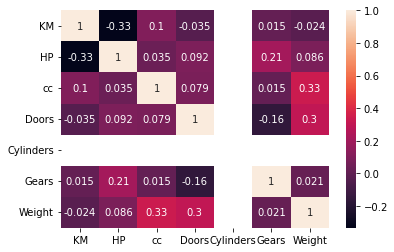

In [12]:

sns.heatmap(df.corr(),annot=True)

<Figure size 864x720 with 0 Axes>

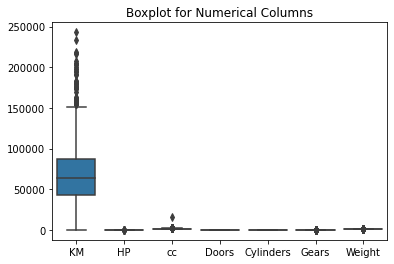

<Figure size 864x720 with 0 Axes>

In [13]:

sns.boxplot(data=numerical_cols)
plt.title('Boxplot for Numerical Columns')
plt.figure(figsize=(12, 10))

In [14]:
df.columns

Index(['KM', 'Fuel_Type', 'HP', 'cc', 'Doors', 'Cylinders', 'Gears', 'Weight'], dtype='object')

In [15]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [16]:
df.head()

,KM,Fuel_Type,HP,cc,Doors,Cylinders,Gears,Weight
Price,,,,,,,,
13500,46986,Diesel,90,2000,3,4,5,1165
13750,72937,Diesel,90,2000,3,4,5,1165
13950,41711,Diesel,90,2000,3,4,5,1165
14950,48000,Diesel,90,2000,3,4,5,1165
13750,38500,Diesel,90,2000,3,4,5,1170


In [17]:

df = pd.get_dummies(data=df,columns=['Fuel_Type'],dtype=int)

In [18]:
df

,KM,HP,cc,Doors,Cylinders,Gears,Weight,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Petrol
Price,,,,,,,,,,
13500,46986,90,2000,3,4,5,1165,0,1,0
13750,72937,90,2000,3,4,5,1165,0,1,0
13950,41711,90,2000,3,4,5,1165,0,1,0
14950,48000,90,2000,3,4,5,1165,0,1,0
13750,38500,90,2000,3,4,5,1170,0,1,0
...,...,...,...,...,...,...,...,...,...,...
7500,20544,86,1300,3,4,5,1025,0,0,1
10845,19000,86,1300,3,4,5,1015,0,0,1
8500,17016,86,1300,3,4,5,1015,0,0,1


In [21]:

# Function to remove outliers using IQR
def remove_outliers_iqr(df):
    # Calculate Q1, Q3, and IQR for each column
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1

    # Define lower and upper bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Filter the dataset to remove outliers
    df_cleaned = df[~((df < lower_bound) | (df > upper_bound)).any(axis=1)]
    return df_cleaned

# Remove outliers
df_cleaned = remove_outliers_iqr(df)

print("Original Data:")
print(df)
print("\nData After Removing Outliers:")
print(df_cleaned)

Original Data:
          KM   HP    cc  Doors  Cylinders  Gears  Weight  Fuel_Type_CNG  \
Price                                                                     
13500  46986   90  2000      3          4      5    1165              0   
13750  72937   90  2000      3          4      5    1165              0   
13950  41711   90  2000      3          4      5    1165              0   
14950  48000   90  2000      3          4      5    1165              0   
13750  38500   90  2000      3          4      5    1170              0   
...      ...  ...   ...    ...        ...    ...     ...            ...   
7500   20544   86  1300      3          4      5    1025              0   
10845  19000   86  1300      3          4      5    1015              0   
8500   17016   86  1300      3          4      5    1015              0   
7250   16916   86  1300      3          4      5    1015              0   
6950       1  110  1600      5          4      5    1114              0   

       Fu

In [22]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [23]:
sc = StandardScaler()

In [24]:

df.head()


,KM,HP,cc,Doors,Cylinders,Gears,Weight,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Petrol
Price,,,,,,,,,,
13500,46986,90,2000,3,4,5,1165,0,1,0
13750,72937,90,2000,3,4,5,1165,0,1,0
13950,41711,90,2000,3,4,5,1165,0,1,0
14950,48000,90,2000,3,4,5,1165,0,1,0
13750,38500,90,2000,3,4,5,1170,0,1,0


In [25]:
sc.fit_transform(df)

array([[-0.57564394, -0.76809094,  0.99745836, ..., -0.10953163,
         2.88299988, -2.71771318],
       [ 0.11655421, -0.76809094,  0.99745836, ..., -0.10953163,
         2.88299988, -2.71771318],
       [-0.71634546, -0.76809094,  0.99745836, ..., -0.10953163,
         2.88299988, -2.71771318],
       ...,
       [-1.37504197, -1.03518822, -0.65222192, ..., -0.10953163,
        -0.34686092,  0.36795642],
       [-1.3777093 , -1.03518822, -0.65222192, ..., -0.10953163,
        -0.34686092,  0.36795642],
       [-1.82888774,  0.56739546,  0.05478391, ..., -0.10953163,
        -0.34686092,  0.36795642]])

In [26]:
scaled_data = pd.DataFrame(sc.fit_transform(df),columns=['Price','KM','HP','cc','Cylinders','Gears','weight','Fuel_Type_CNG','Fuel_Type_Diesel','Fuel_Type_Petrol'])
scaled_data

,Price,KM,HP,cc,Cylinders,Gears,weight,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Petrol
0,-0.575644,-0.768091,0.997458,-1.084090,0.0,-0.140525,1.774566,-0.109532,2.883000,-2.717713
1,0.116554,-0.768091,0.997458,-1.084090,0.0,-0.140525,1.774566,-0.109532,2.883000,-2.717713
2,-0.716345,-0.768091,0.997458,-1.084090,0.0,-0.140525,1.774566,-0.109532,2.883000,-2.717713
3,-0.548597,-0.768091,0.997458,-1.084090,0.0,-0.140525,1.774566,-0.109532,2.883000,-2.717713
4,-0.801993,-0.768091,0.997458,-1.084090,0.0,-0.140525,1.870320,-0.109532,2.883000,-2.717713
...,...,...,...,...,...,...,...,...,...,...
1429,-1.280939,-1.035188,-0.652222,-1.084090,0.0,-0.140525,-0.906554,-0.109532,-0.346861,0.367956
1430,-1.322122,-1.035188,-0.652222,-1.084090,0.0,-0.140525,-1.098063,-0.109532,-0.346861,0.367956
1431,-1.375042,-1.035188,-0.652222,-1.084090,0.0,-0.140525,-1.098063,-0.109532,-0.346861,0.367956
1432,-1.377709,-1.035188,-0.652222,-1.084090,0.0,-0.140525,-1.098063,-0.109532,-0.346861,0.367956


In [27]:
scaled_data.describe()

,Price,KM,HP,cc,Cylinders,Gears,weight,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Petrol
count,1.434000e+03,1.434000e+03,1.434000e+03,1.434000e+03,1434.0,1.434000e+03,1.434000e+03,1.434000e+03,1.434000e+03,1.434000e+03
mean,2.709749e-17,-1.237968e-15,9.594448e-17,6.638112e-16,0.0,-9.909553e-16,1.558493e-16,-4.242500e-16,-2.855534e-15,5.623117e-16
std,1.000349e+00,1.000349e+00,1.000349e+00,1.000349e+00,0.0,1.000349e+00,1.000349e+00,1.000349e+00,1.000349e+00,1.000349e+00
min,-1.828888e+00,-2.170352e+00,-6.522219e-01,-2.133775e+00,0.0,-1.074647e+01,-1.385326e+00,-1.095316e-01,-3.468609e-01,-2.717713e+00
25%,-6.819636e-01,-7.680909e-01,-4.165533e-01,-1.084090e+00,0.0,-1.405250e-01,-6.192913e-01,-1.095316e-01,-3.468609e-01,3.679564e-01
50%,-1.381089e-01,5.673955e-01,5.478391e-02,-3.440392e-02,0.0,-1.405250e-01,-4.476547e-02,-1.095316e-01,-3.468609e-01,3.679564e-01
75%,4.933209e-01,5.673955e-01,5.478391e-02,1.015282e+00,0.0,-1.405250e-01,2.424974e-01,-1.095316e-01,-3.468609e-01,3.679564e-01
max,4.652691e+00,6.042890e+00,3.399106e+01,1.015282e+00,0.0,5.162445e+00,1.039245e+01,9.129783e+00,2.883000e+00,3.679564e-01


In [28]:
import statsmodels.formula.api as smf

In [29]:
model = smf.ols('Price ~ KM + HP + cc  + Cylinders + Gears + weight',data=scaled_data).fit()

In [30]:
model.params

Intercept    1.058181e-16
KM          -3.539840e-01
HP           1.279357e-01
cc           1.444907e-02
Cylinders   -6.572297e-17
Gears        9.044125e-02
weight      -4.238842e-02
dtype: float64

In [31]:
model.pvalues

Intercept    1.000000e+00
KM           2.331075e-41
HP           1.116834e-06
cc           5.844920e-01
Cylinders    3.969828e-07
Gears        4.437760e-04
weight       1.225990e-01
dtype: float64

In [32]:
pd.DataFrame()

""


In [33]:

vif = pd.DataFrame()
vif

""


In [34]:
scaled_data.columns

Index(['Price', 'KM', 'HP', 'cc', 'Cylinders', 'Gears', 'weight',
       'Fuel_Type_CNG', 'Fuel_Type_Diesel', 'Fuel_Type_Petrol'],
      dtype='object')

In [35]:
vif['Features'] = scaled_data.columns

In [36]:
vif

,Features
0,Price
1,KM
2,HP
3,cc
4,Cylinders
5,Gears
6,weight
7,Fuel_Type_CNG
8,Fuel_Type_Diesel
9,Fuel_Type_Petrol


In [37]:
len(scaled_data.columns)

10

In [38]:
range(len(scaled_data.columns))

range(0, 10)

In [39]:
scaled_data

,Price,KM,HP,cc,Cylinders,Gears,weight,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Petrol
0,-0.575644,-0.768091,0.997458,-1.084090,0.0,-0.140525,1.774566,-0.109532,2.883000,-2.717713
1,0.116554,-0.768091,0.997458,-1.084090,0.0,-0.140525,1.774566,-0.109532,2.883000,-2.717713
2,-0.716345,-0.768091,0.997458,-1.084090,0.0,-0.140525,1.774566,-0.109532,2.883000,-2.717713
3,-0.548597,-0.768091,0.997458,-1.084090,0.0,-0.140525,1.774566,-0.109532,2.883000,-2.717713
4,-0.801993,-0.768091,0.997458,-1.084090,0.0,-0.140525,1.870320,-0.109532,2.883000,-2.717713
...,...,...,...,...,...,...,...,...,...,...
1429,-1.280939,-1.035188,-0.652222,-1.084090,0.0,-0.140525,-0.906554,-0.109532,-0.346861,0.367956
1430,-1.322122,-1.035188,-0.652222,-1.084090,0.0,-0.140525,-1.098063,-0.109532,-0.346861,0.367956
1431,-1.375042,-1.035188,-0.652222,-1.084090,0.0,-0.140525,-1.098063,-0.109532,-0.346861,0.367956
1432,-1.377709,-1.035188,-0.652222,-1.084090,0.0,-0.140525,-1.098063,-0.109532,-0.346861,0.367956


In [45]:
scaled_data = sc.fit_transform(df) 

In [46]:
from statsmodels.tools.tools import add_constant

In [47]:


# Step 2: Add a constant to the scaled data
scaled_data_with_const = add_constant(scaled_data)

# Step 3: Compute VIF
vif_data = pd.DataFrame()
vif_data["Feature"] = ["const"] + df.columns.tolist()
vif_data["VIF"] = [
    variance_inflation_factor(scaled_data_with_const, i)
    for i in range(scaled_data_with_const.shape[1])
]

print(vif_data)

             Feature       VIF
0              const  1.000000
1                 KM  1.447844
2                 HP  2.250500
3                 cc  1.209067
4              Doors  1.202045
5          Cylinders       NaN
6              Gears  1.105441
7             Weight  2.763842
8      Fuel_Type_CNG       inf
9   Fuel_Type_Diesel       inf
10  Fuel_Type_Petrol       inf


In [56]:
#Drop the 'Fuel_Type_Petrol' column to avoid multicollinearity
df = df.drop(columns=["Fuel_Type_Petrol","Cylinders"], errors="ignore")
# Step 4: Recalculate VIF
df_with_const = add_constant(df)
vif_data = pd.DataFrame()
vif_data["Feature"] = df_with_const.columns
vif_data["VIF"] = [
    variance_inflation_factor(df_with_const.values, i)
    for i in range(df_with_const.shape[1])
]
print("VIF After Dropping High VIF Columns:\n", vif_data)

VIF After Dropping High VIF Columns:
             Feature          VIF
0             const  1514.639526
1                KM     1.447963
2                HP     2.250500
3                cc     1.209067
4             Doors     1.202045
5             Gears     1.105441
6            Weight     2.763842
7     Fuel_Type_CNG     1.069742
8  Fuel_Type_Diesel     4.073821


In [57]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

print(df.columns)
df

Index(['KM', 'HP', 'cc', 'Doors', 'Gears', 'Weight', 'Fuel_Type_CNG',
       'Fuel_Type_Diesel'],
      dtype='object')


,KM,HP,cc,Doors,Gears,Weight,Fuel_Type_CNG,Fuel_Type_Diesel
Price,,,,,,,,
13500,46986,90,2000,3,5,1165,0,1
13750,72937,90,2000,3,5,1165,0,1
13950,41711,90,2000,3,5,1165,0,1
14950,48000,90,2000,3,5,1165,0,1
13750,38500,90,2000,3,5,1170,0,1
...,...,...,...,...,...,...,...,...
7500,20544,86,1300,3,5,1025,0,0
10845,19000,86,1300,3,5,1015,0,0
8500,17016,86,1300,3,5,1015,0,0


In [58]:
# Example: convert scaled_data to DataFrame if it's a NumPy array
scaled_data = pd.DataFrame(scaled_data, columns=['KM', 'HP', 'cc', 'Cylinders', 'Gears', 'Weight', 'Price','Fuel_Type_CNG','Fuel_Type_Diesel','Fuel_Type_Petrol'])
X = scaled_data[['KM', 'HP', 'cc', 'Cylinders', 'Gears', 'Weight']]  # Feature columns
y = scaled_data[['Price']]  # Target column

In [59]:
# Assuming df is your DataFrame
X = scaled_data[['KM', 'HP', 'cc', 'Cylinders', 'Gears', 'Weight']]  # Feature columns
y = scaled_data[['Price']]  # Target column

In [60]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2)

In [67]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [69]:
# List of different feature sets for which we want to create models
feature_sets = [
    ["KM", "HP"],                  # Model 1: Only KM and HP
    ["KM", "HP", "cc"],             # Model 2: KM, HP, and cc
    ["KM", "HP", "cc", "Gears"],    # Model 3: KM, HP, cc, and Gears
    ["KM", "HP", "cc", "Weight"],   # Model 4: KM, HP, cc, and Weight
]

# Loop through each feature set and train a model
for features in feature_sets:
    print(f"\nTraining model with features: {features}")
    
    # Prepare the data for the model
    X_train_model = X_train_scaled[:, [X.columns.get_loc(f) for f in features]]
    X_test_model = X_test_scaled[:, [X.columns.get_loc(f) for f in features]]
    
    # Create and train the model
    model = LinearRegression()
    model.fit(X_train_model, y_train)
    
    # Predict on the test set
    y_pred = model.predict(X_test_model)
    
    # Evaluate the model
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    # Print model evaluation
    print(f"Mean Squared Error: {mse:.4f}")
    print(f"R^2 Score: {r2:.4f}")
    print(f"Model Coefficients: {model.coef_}")
    print(f"Model Intercept: {model.intercept_}")


Training model with features: ['KM', 'HP']
Mean Squared Error: 0.7577
R^2 Score: 0.0106
Model Coefficients: [[0.00431135 0.08329379]]
Model Intercept: [0.00923094]

Training model with features: ['KM', 'HP', 'cc']
Mean Squared Error: 0.6226
R^2 Score: 0.1870
Model Coefficients: [[-0.03177893  0.0617534   0.32346335]]
Model Intercept: [0.00923094]

Training model with features: ['KM', 'HP', 'cc', 'Gears']
Mean Squared Error: 0.6226
R^2 Score: 0.1870
Model Coefficients: [[-0.03177893  0.0617534   0.32346335  0.        ]]
Model Intercept: [0.00923094]

Training model with features: ['KM', 'HP', 'cc', 'Weight']
Mean Squared Error: 0.6227
R^2 Score: 0.1868
Model Coefficients: [[-0.03234043  0.06013709  0.3234843   0.00685506]]
Model Intercept: [0.00923094]


In [70]:
from sklearn.linear_model import Ridge, Lasso

ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)
ridge_pred = ridge.predict(X_test)
ridge_mse = mean_squared_error(y_test, ridge_pred)
ridge_r2 = r2_score(y_test, ridge_pred)



In [71]:
print("Ridge Regression:")
print("Coefficients:", ridge.coef_)
print("Intercept:", ridge.intercept_)
print("Mean Squared Error:", ridge_mse)
print("R^2 Score:", ridge_r2)

Ridge Regression:
Coefficients: [[-0.04230458  0.02212505  0.27512521  0.27505529  0.          0.05474008]]
Intercept: [0.01023712]
Mean Squared Error: 0.5316395743165422
R^2 Score: 0.3057676618029609


In [72]:
lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)
lasso_pred = lasso.predict(X_test)
# Evaluate Lasso Regression
lasso_mse = mean_squared_error(y_test, lasso_pred)
lasso_r2 = r2_score(y_test, lasso_pred)

In [73]:
print("\nLasso Regression:")
print("Coefficients:", lasso.coef_)
print("Intercept:", lasso.intercept_)
print("Mean Squared Error:", lasso_mse)
print("R^2 Score:", lasso_r2)


Lasso Regression:
Coefficients: [-0.          0.          0.19750761  0.17643925  0.          0.        ]
Intercept: [0.00848057]
Mean Squared Error: 0.5888462979935388
R^2 Score: 0.2310652516410967


In [74]:
from sklearn.linear_model import LassoCV
lasso = LassoCV(cv=5)  # 5-fold cross-validation
lasso.fit(X_train_scaled, y_train)
print(f"Best alpha: {lasso.alpha_}")

Best alpha: 0.21211836641488385


In [75]:
# Using the best alpha found through cross-validation
best_alpha = 0.21211836641488385

# Create the final Lasso model with the best alpha
lasso_best = Lasso(alpha=best_alpha)

# Train the model
lasso_best.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred = lasso_best.predict(X_test_scaled)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Final Model - Lasso Regression:")
print(f"Mean Squared Error: {mse}")
print(f"R² Score: {r2}")

# Optionally, print the coefficients to see the effect of regularization
print(f"Model Coefficients: {lasso_best.coef_}")
print(f"Model Intercept: {lasso_best.intercept_}")

Final Model - Lasso Regression:
Mean Squared Error: 0.6772743997428341
R² Score: 0.11559294520367724
Model Coefficients: [-0.          0.          0.10428548  0.07336121  0.          0.        ]
Model Intercept: [0.00923094]


In [76]:
from sklearn.ensemble import RandomForestRegressor

In [77]:
# Create the Random Forest model
rf = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred_rf = rf.predict(X_test_scaled)

# Evaluate the model
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f"Random Forest Regression:")
print(f"Mean Squared Error: {mse_rf}")
print(f"R² Score: {r2_rf}")

Random Forest Regression:
Mean Squared Error: 0.15861815047628286
R² Score: 0.7928712330582173


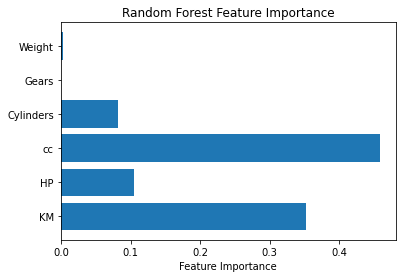

In [78]:
# Get feature importance
feature_importances = rf.feature_importances_

# Plot feature importance
plt.barh(range(len(feature_importances)), feature_importances)
plt.yticks(range(len(feature_importances)), X_train.columns)
plt.xlabel('Feature Importance')
plt.title('Random Forest Feature Importance')
plt.show()

In [80]:
from sklearn.model_selection import GridSearchCV
# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Set up GridSearchCV
grid_search = GridSearchCV(estimator=RandomForestRegressor(), param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

# Fit the model
grid_search.fit(X_train_scaled, y_train)

# Best parameters found
print("Best Parameters: ", grid_search.best_params_)

# Evaluate with the best parameters
best_rf = grid_search.best_estimator_
y_pred_best_rf = best_rf.predict(X_test_scaled)
mse_best_rf = mean_squared_error(y_test, y_pred_best_rf)
r2_best_rf = r2_score(y_test, y_pred_best_rf)

print(f"Optimized Random Forest Regression:")
print(f"Mean Squared Error: {mse_best_rf}")
print(f"R² Score: {r2_best_rf}")

Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best Parameters:  {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 100}
Optimized Random Forest Regression:
Mean Squared Error: 0.12869095792259644
R² Score: 0.8319511395699328


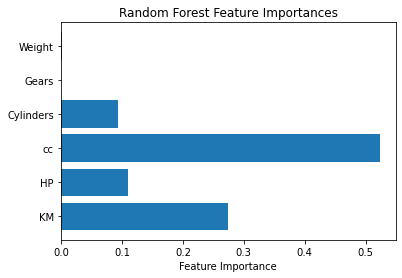

In [81]:
# Get feature importances
feature_importances = best_rf.feature_importances_

# Plot feature importances
import matplotlib.pyplot as plt
plt.barh(X_train.columns, feature_importances)
plt.xlabel("Feature Importance")
plt.title("Random Forest Feature Importances")
plt.show()

Interview Questions:- 

1.Normalization:-
Normalization rescales the data to fit within a specific range, typically [0, 1] or [-1, 1]. It is useful when you need the data to have a uniform scale without altering the underlying distribution.

standardization:-
Standardization transforms data to have a mean of 0 and a standard deviation of 1. It adjusts the scale of the features without bounding them to a specific range.
Normalization and standardization are helpful because they address the issues caused by differences in the scale or distribution of features in a dataset. This is particularly important for machine learning algorithms, which are sensitive to the scale and distribution of input data.


2.Techniques of multicollinearity in MLR:-
          1. Variance Inflation Factor (VIF) Analysis
          2. Remove Highly Correlated Variable
          3. Principal Component Analysis (PCA)
          4. Regularization Techniques 
          5. Centering and Scaling
          6. Domain Knowledge-Based Variable Selection
          7. Collect More Data
